<a href="https://colab.research.google.com/github/Strugoeden121/DataScience236006-Final/blob/main/236003_Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

In [30]:
# Load the Adult Income dataset (replace with actual file path if needed)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns_for_underepresented = ['age-binned', 'workclass', 'education', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'continent']

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']


# Load the dataset into a DataFrame
df = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)

# Drop rows with missing values
df = df.dropna()

In [ ]:
#binning
# Step 1: Binning the 'age' column into decades
df['age-binned'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 100],
                          labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100'])

# Step 2: Mapping 'native-country' to continents
def map_country_to_continent(country):
    continent_map = {
        'North America': ['United-States', 'Canada', 'Mexico','Outlying-US(Guam-USVI-etc)',],
        'Central America': [ 'Puerto-Rico', 'Honduras', 'Cuba', 'Dominican-Republic', 'Jamaica', 'El-Salvador', 'Haiti', 'Trinadad&Tobago'],
        'Asia': ['China', 'India', 'Japan', 'Philippines', 'Vietnam', 'South'],
        'Europe': ['England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 'Greece', 'Ireland'],
        'South America': ['Columbia', 'Ecuador', 'Peru'],
        'Africa': ['South-Africa', 'Egypt'],

    }

    for continent, countries in continent_map.items():
        if country in countries:
            return continent
    return 'Other'

df['continent'] = df['native-country'].apply(map_country_to_continent)

In [ ]:
# Function to calculate the proportion of each group in the dataset based on a variable threshold
def calculate_group_proportions(df, columns, threshold):
    proportions = {}
    for col in columns:
        group_counts = df[col].value_counts(normalize=True)
        proportions[col] = group_counts[group_counts < threshold]  # Identify groups under threshold
    return proportions


In [ ]:
# Single-column underrepresented groups with a 10% threshold
single_column_underrepresented = calculate_group_proportions(df, columns_for_underepresented, 0.20)

# Display single-column underrepresented groups
print("Single-column underrepresented groups:")
for feature, groups in single_column_underrepresented.items():
    if not groups.empty:
        print(f"Feature: {feature}")
        print(groups)
        print()


Single-column underrepresented groups:
Feature: age-binned
age-binned
51-60     0.126777
0-20      0.074015
61-70     0.055035
71-80     0.013544
81-100    0.003040
Name: proportion, dtype: float64

Feature: workclass
workclass
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: proportion, dtype: float64

Feature: education
education
Bachelors      0.164461
Masters        0.052916
Assoc-voc      0.042443
11th           0.036086
Assoc-acdm     0.032769
10th           0.028654
7th-8th        0.019840
Prof-school    0.017690
9th            0.015786
12th           0.013298
Doctorate      0.012684
5th-6th        0.010227
1st-4th        0.005160
Preschool      0.001566
Name: proportion, dtype: float64

Feature: marital-status
marital-status
Divorced                 0.136452
Separated                0.031479


In [ ]:
# Multi-column underrepresented groups with more diverse thresholds
def find_joint_underrepresented_groups(df, feature_combinations, threshold):
    joint_groups = []
    for due in feature_combinations:
        grouped = df.groupby(list(due)).size() / len(df)
        underrepresented = grouped[grouped < threshold]
        if not underrepresented.empty:
            joint_groups.append((due, underrepresented))
    return joint_groups


In [ ]:
feature_combinations = [combinations(columns_for_underepresented, 2)]  # 2 columns
flat_combinations = [item for sublist in feature_combinations for item in sublist]
joint_underrepresented_groups = find_joint_underrepresented_groups(df, flat_combinations, 0.10)
print(joint_underrepresented_groups)

<ipython-input-24-a9b566fa2d89>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(list(due)).size() / len(df)
<ipython-input-24-a9b566fa2d89>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(list(due)).size() / len(df)
<ipython-input-24-a9b566fa2d89>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(list(due)).size() / len(df)
<ipython-input-24-a9b566fa2d89>:5:

[(('age-binned', 'workclass'), age-binned  workclass       
0-20        ?                   0.011793
            Federal-gov         0.000553
            Local-gov           0.001443
            Never-worked        0.000154
            Private             0.056325
                                  ...   
81-100      Private             0.001474
            Self-emp-inc        0.000215
            Self-emp-not-inc    0.000430
            State-gov           0.000031
            Without-pay         0.000000
Length: 69, dtype: float64), (('age-binned', 'education'), age-binned  education   
0-20        10th            0.006357
            11th            0.012837
            12th            0.004300
            1st-4th         0.000123
            5th-6th         0.000369
                              ...   
81-100      HS-grad         0.001013
            Masters         0.000215
            Preschool       0.000000
            Prof-school     0.000123
            Some-college    0.00039

In [ ]:
#Plot Underrepresented

In [4]:
!pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 12.0 MB/s eta 0:00:00


In [8]:
!pip install networkx

In [11]:
#Weight Calculation

import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [62]:
data = [
    ('age', 'education_num'),
    ('age', 'hours_per_week'),
    ('age', 'income'),
    ('age', 'marital_status'),
    ('age', 'occupation'),
    ('age', 'relationship'),
    ('age', 'work_class'),
    ('education_num', 'education'),
    ('education_num', 'hours_per_week'),
    ('education_num', 'income'),
    ('education_num', 'occupation'),
    ('education_num', 'work_class'),
    ('education_num', 'work_class'),
    ('hours_per_week', 'income'),
    ('hours_per_week', 'relationship'),
    ('income', 'education'),
    ('marital_status', 'education_num'),
    ('marital_status', 'hours_per_week'),
    ('marital_status', 'income'),
    ('marital_status', 'occupation'),
    ('marital_status', 'work_class'),
    ('native_country', 'education'),
    ('native_country', 'education_num'),
    ('native_country', 'hours_per_week'),
    ('native_country', 'income'),
    ('native_country', 'marital_status'),
    ('native_country', 'occupation'),
    ('native_country', 'race'),
    ('native_country', 'work_class'),
    ('occupation', 'education'),
    ('occupation', 'income'),
    ('race', 'education_num'),
    ('race', 'hours_per_week'),
    ('race', 'income'),
    ('race', 'marital_status'),
    ('race', 'occupation'),
    ('race', 'work_class'),
    ('sex', 'education_num'),
    ('sex', 'hours_per_week'),
    ('sex', 'income'),
    ('sex', 'marital_status'),
    ('sex', 'occupation'),
    ('sex', 'race'),
    ('sex', 'relationship'),
    ('sex', 'work_class'),
    ('work_class', 'income'),
]

# Remove '_' from all strings in the list of tuples
#data_no_underscore = [(row[0].replace('_', ' '), row[1].replace('_', ' ')) for row in data]
#dag = nx.DiGraph(data_no_underscore)
dag = nx.DiGraph(data)
print(f"Number of nodes: {len(dag.nodes)}")
print(f"Number of edges: {len(dag.edges)}")
print(nx.is_directed_acyclic_graph(dag))

Number of nodes: 12
Number of edges: 45
True


In [63]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'work_class', 'fnlwgt', 'education', 'education_num', 'marital_status',
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                'hours_per_week', 'native_country', 'income']

df = pd.read_csv(url, names=column_names, na_values=" ?", skipinitialspace=True)
df = df.dropna()
label_cols = ['work_class', 'education', 'marital_status', 'occupation',
              'relationship', 'race', 'sex', 'native_country', 'income', 'education_num']

In [64]:
#Dealing With Categorical Values - encoding into numerical values
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


   age  work_class  fnlwgt  education  education_num  marital_status  \
0   39           7   77516          9             12               4   
1   50           6   83311          9             12               2   
2   38           4  215646         11              8               0   
3   53           4  234721          1              6               2   
4   28           4  338409          9             12               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours_per_week  native_country  income  
0              40              39       0  
1              13              39       0  
2             

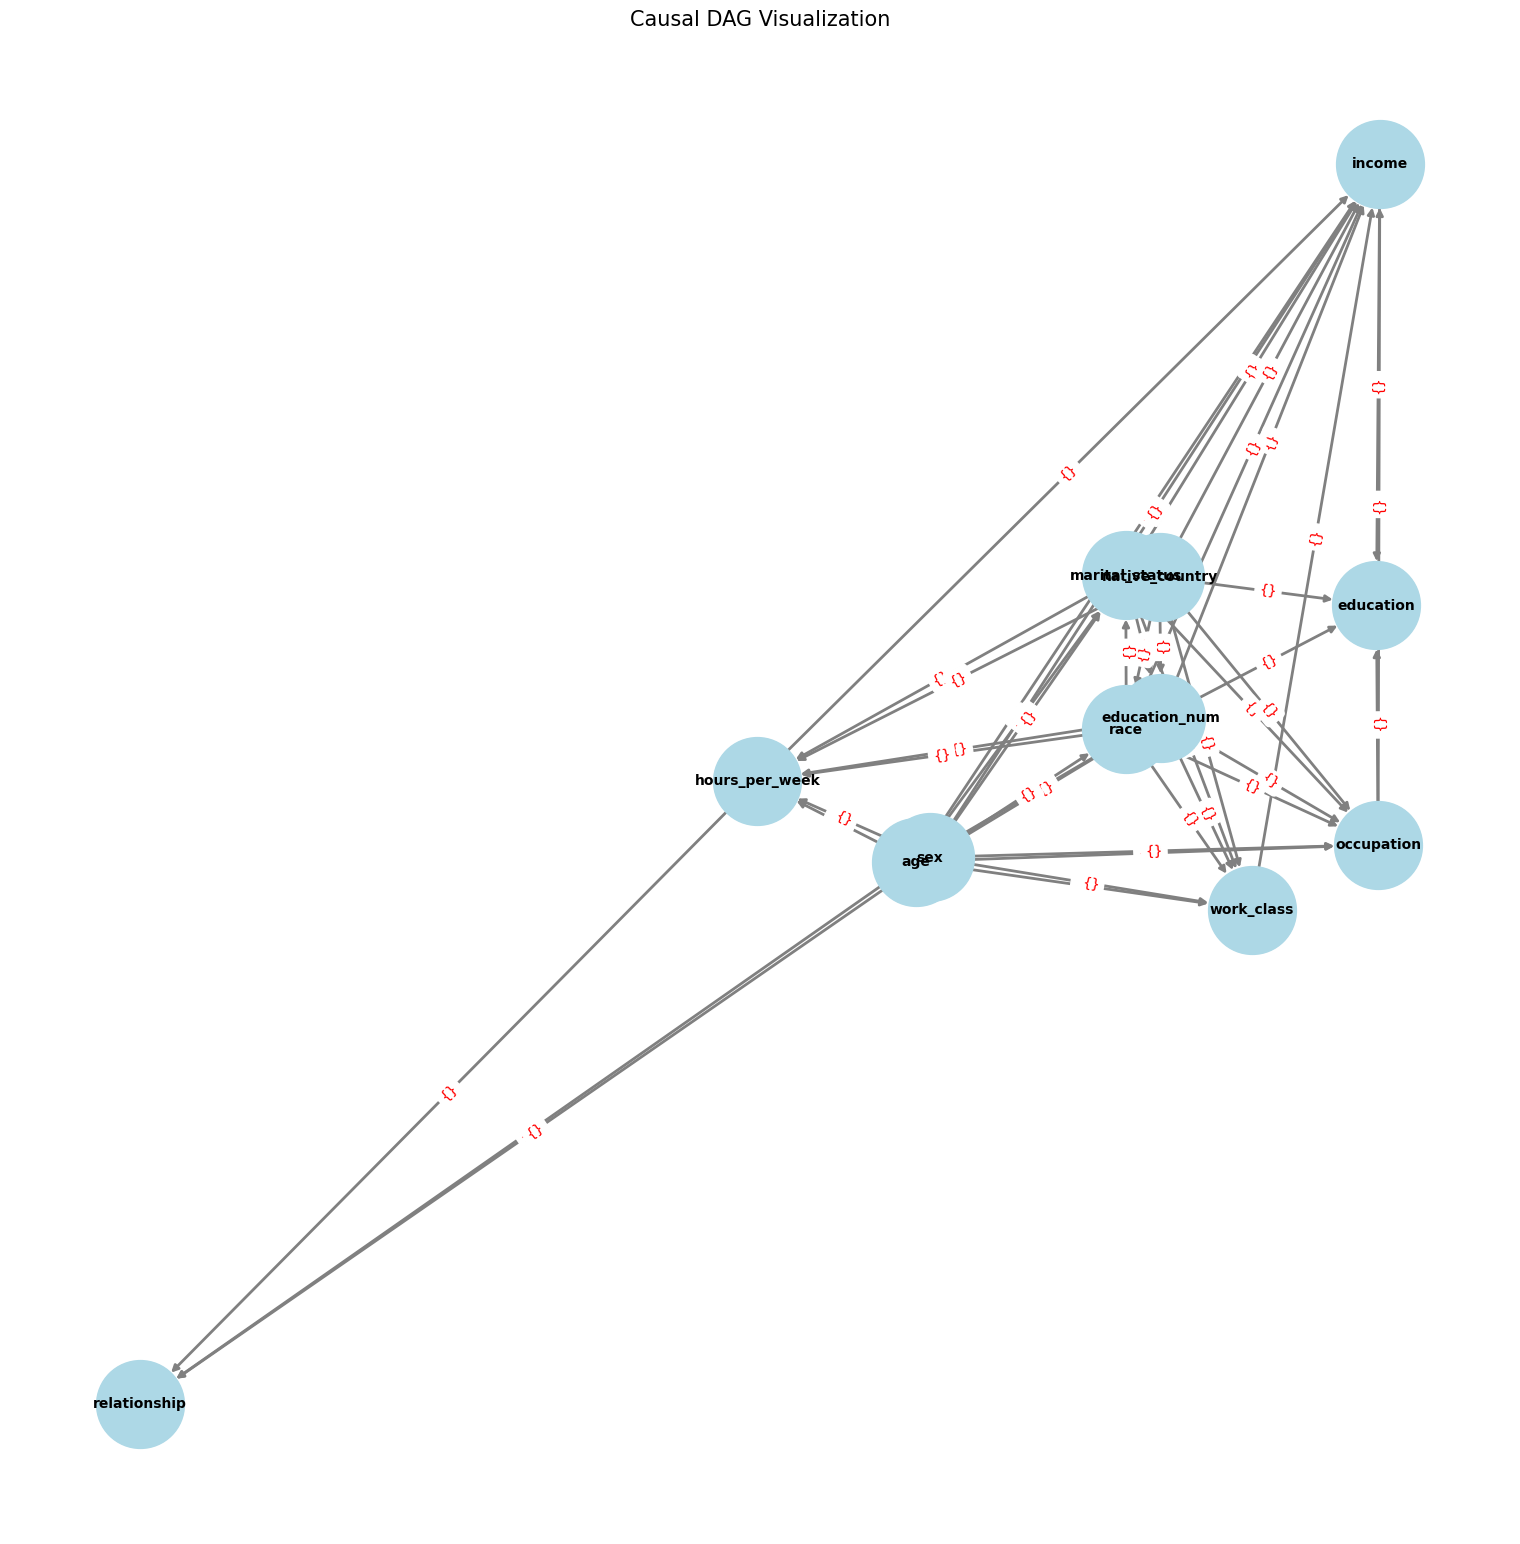

In [65]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(15, 15))

pos = nx.spring_layout(dag, k=0.5, iterations=100)  # k controls the distance between nodes

nx.draw(dag, pos, with_labels=True,
        node_size=4000,
        node_color='lightblue',
        font_size=10,
        font_weight='bold',
        edge_color='gray',
        width=2)


nx.draw_networkx_edge_labels(dag, pos, font_color='red')

# Show the plot
plt.title("Causal DAG Visualization", size=15)
plt.show()


In [59]:
#Identifying Causal Effects Using Backdoor Criterion
"""
In this step, we identify the causal effects for each edge using DoWhy’s identify_effect method. For each pair of connected nodes, we will compute the causal effect.

We define two methods to estimate the causal effects (weights):

- Linear Regression (basic and interpretable).
- Propensity Score Matching (adjusts for confounding by matching).

Explanation of the Two Methods:
Linear Regression: This method provides an interpretable and quick way to estimate causal effects. It works well when relationships between variables are linear or can be well-approximated by a linear model. It adjusts for confounders by including them in the regression.

Propensity Score Matching (PSM): This method is used when we are concerned about confounding. PSM balances the treatment and control groups by matching units with similar propensity scores, ensuring that the observed confounders are balanced between groups. This method helps in reducing bias due to confounding.
"""

'\nIn this step, we identify the causal effects for each edge using DoWhy’s identify_effect method. For each pair of connected nodes, we will compute the causal effect.\n\nWe define two methods to estimate the causal effects (weights):\n\n- Linear Regression (basic and interpretable).\n- Propensity Score Matching (adjusts for confounding by matching).\n\nExplanation of the Two Methods:\nLinear Regression: This method provides an interpretable and quick way to estimate causal effects. It works well when relationships between variables are linear or can be well-approximated by a linear model. It adjusts for confounders by including them in the regression.\n\nPropensity Score Matching (PSM): This method is used when we are concerned about confounding. PSM balances the treatment and control groups by matching units with similar propensity scores, ensuring that the observed confounders are balanced between groups. This method helps in reducing bias due to confounding.\n'

In [66]:
# Convert the graph to PyDot format
pydot_graph = to_pydot(dag)

# Loop through each edge in the DAG and estimate the causal effect
causal_weights_lr = {}

for treatment, outcome in dag.edges:
    # Create the causal model for the current treatment-outcome pair
    model = CausalModel(
        data=df,
        treatment=treatment,
        outcome=outcome,
        graph=pydot_graph.to_string()
    )

    # Identify the effect using the backdoor criterion
    identified_estimand = model.identify_effect()
    print(f"Adjustment set for {treatment} -> {outcome}: {identified_estimand.get_backdoor_variables()}")

    # Estimate the causal effect using linear regression
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
    causal_weights_lr[(treatment, outcome)] = estimate.value
    print(f"Estimated causal effect (Linear Regression) of {treatment} on {outcome}: {estimate.value}")

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is depr

Adjustment set for age -> education_num: []
Estimated causal effect (Linear Regression) of age on education_num: 0.006302788105866597


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> hours_per_week: []
Estimated causal effect (Linear Regression) of age on hours_per_week: 0.04905205059907303


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> income: []
Estimated causal effect (Linear Regression) of age on income: 0.0068145024946321825


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> marital_status: []
Estimated causal effect (Linear Regression) of age on marital_status: -0.028291456567167028


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> occupation: []
Estimated causal effect (Linear Regression) of age on occupation: -0.008197143921305106


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> relationship: []
Estimated causal effect (Linear Regression) of age on relationship: -0.026191435808927466


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> work_class: []
Estimated causal effect (Linear Regression) of age on work_class: -0.0004277844725746327


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for education_num -> education: ['native_country', 'sex', 'race', 'age', 'marital_status']
Estimated causal effect (Linear Regression) of education_num on education: 0.5364528025830699


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for education_num -> hours_per_week: ['native_country', 'sex', 'race', 'age', 'marital_status']
Estimated causal effect (Linear Regression) of education_num on hours_per_week: 0.6486207736448364


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for education_num -> income: ['native_country', 'sex', 'race', 'age', 'marital_status']
Estimated causal effect (Linear Regression) of education_num on income: 0.05292035373681139


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for education_num -> occupation: ['native_country', 'sex', 'race', 'age', 'marital_status']
Estimated causal effect (Linear Regression) of education_num on occupation: 0.18204316722517255
Adjustment set for education_num -> work_class: ['native_country', 'sex', 'race', 'age', 'marital_status']


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimated causal effect (Linear Regression) of education_num on work_class: 0.026958442280564654
Adjustment set for hours_per_week -> income: ['native_country', 'sex', 'race', 'age', 'education_num', 'marital_status']


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of hours_per_week on income: 0.004133400892905578
Adjustment set for hours_per_week -> relationship: ['sex', 'age']


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimated causal effect (Linear Regression) of hours_per_week on relationship: -0.01446836788010053
Adjustment set for income -> education: ['native_country', 'occupation', 'education_num']


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimated causal effect (Linear Regression) of income on education: -0.39485373735639584
Adjustment set for marital_status -> education_num: ['race', 'native_country', 'age', 'sex']
Estimated causal effect (Linear Regression) of marital_status on education_num: -0.10494935588027055


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for marital_status -> hours_per_week: ['race', 'native_country', 'age', 'sex']
Estimated causal effect (Linear Regression) of marital_status on hours_per_week: -1.3210140781020527


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for marital_status -> income: ['race', 'native_country', 'age', 'sex']
Estimated causal effect (Linear Regression) of marital_status on income: -0.035215762710961496


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for marital_status -> occupation: ['race', 'native_country', 'age', 'sex']
Estimated causal effect (Linear Regression) of marital_status on occupation: -0.02050221388465978


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for marital_status -> work_class: ['race', 'native_country', 'age', 'sex']
Estimated causal effect (Linear Regression) of marital_status on work_class: -0.05454175411138573


Adjustment set for occupation -> education: ['native_country', 'sex', 'race', 'age', 'education_num', 'marital_status']


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of occupation on education: -0.055509896983990004
Adjustment set for occupation -> income: ['native_country', 'sex', 'race', 'age', 'education_num', 'marital_status']


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of occupation on income: 0.0029656109625412763


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)


Adjustment set for work_class -> income: ['native_country', 'sex', 'race', 'age', 'education_num', 'marital_status']


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Estimated causal effect (Linear Regression) of work_class on income: 0.001835394150512426
Adjustment set for native_country -> education: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of native_country on education: 0.03179288098016464
Adjustment set for native_country -> education_num: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of native_country on education_num: 0.016645667787273055
Adjustment set for native_country -> hours_per_week: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of native_country on hours_per_week: -0.003854587873291848
Adjustment set for native_country -> income: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of native_country on income: 0.0008110042664236927
Adjustment set for native_country -> marital_status: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of native_country on marital_status: -0.004293596475528627
Adjustment set for native_country -> occupation: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of native_country on occupation: -0.006553257527332157


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for native_country -> race: []
Estimated causal effect (Linear Regression) of native_country on race: 0.014981190831558244


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for native_country -> work_class: []
Estimated causal effect (Linear Regression) of native_country on work_class: -0.0013772800720075473


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for race -> education_num: ['native_country', 'sex']
Estimated causal effect (Linear Regression) of race on education_num: 0.07291844236405076


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for race -> hours_per_week: ['native_country', 'sex']
Estimated causal effect (Linear Regression) of race on hours_per_week: 0.32454298837595985


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for race -> income: ['native_country', 'sex']
Estimated causal effect (Linear Regression) of race on income: 0.025403574047509397


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for race -> marital_status: ['native_country', 'sex']
Estimated causal effect (Linear Regression) of race on marital_status: -0.09400337101219503


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for race -> occupation: ['native_country', 'sex']
Estimated causal effect (Linear Regression) of race on occupation: 0.008213011468086506


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for race -> work_class: ['native_country', 'sex']
Estimated causal effect (Linear Regression) of race on work_class: 0.07466729088208224


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for sex -> education_num: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is depr

Estimated causal effect (Linear Regression) of sex on education_num: 0.05757917414377367
Adjustment set for sex -> hours_per_week: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimated causal effect (Linear Regression) of sex on hours_per_week: 5.992013017070285


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for sex -> income: []
Estimated causal effect (Linear Regression) of sex on income: 0.1887684231070248


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for sex -> marital_status: []
Estimated causal effect (Linear Regression) of sex on marital_status: -0.38577437193680364


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for sex -> occupation: []
Estimated causal effect (Linear Regression) of sex on occupation: 0.7268479209014531


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for sex -> race: []
Estimated causal effect (Linear Regression) of sex on race: 0.1580853075602744


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for sex -> relationship: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Estimated causal effect (Linear Regression) of sex on relationship: -1.9572413800239459
Adjustment set for sex -> work_class: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of sex on work_class: 0.29698461844449664


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [68]:

# Convert the graph to PyDot format
pydot_graph = to_pydot(dag)

# Loop through each edge in the DAG and estimate the causal effect
causal_weights_psm = {}

for treatment, outcome in dag.edges:
    # Create the causal model for the current treatment-outcome pair
    model = CausalModel(
        data=df,
        treatment=treatment,
        outcome=outcome,
        graph=pydot_graph.to_string()
    )

    identified_estimand = model.identify_effect()
    print(f"Adjustment set for {treatment} -> {outcome}: {identified_estimand.get_backdoor_variables()}")

    if identified_estimand.get_backdoor_variables():
        try:
            estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_matching")
            print(f"Estimated causal effect (Propensity Score Matching) of {treatment} on {outcome}: {estimate.value}")
        except Exception as e:
            print(f"Error using propensity score matching for {treatment} -> {outcome}: {e}")
    else:
        estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
        print(f"Estimated causal effect (Linear Regression) of {treatment} on {outcome}: {estimate.value}")

    causal_weights_psm[(treatment, outcome)] = estimate.value


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is depr

Adjustment set for age -> education_num: []
Estimated causal effect (Linear Regression) of age on education_num: 0.006302788105866597


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> hours_per_week: []
Estimated causal effect (Linear Regression) of age on hours_per_week: 0.04905205059907303


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> income: []
Estimated causal effect (Linear Regression) of age on income: 0.0068145024946321825


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> marital_status: []
Estimated causal effect (Linear Regression) of age on marital_status: -0.028291456567167028


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> occupation: []
Estimated causal effect (Linear Regression) of age on occupation: -0.008197143921305106


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> relationship: []
Estimated causal effect (Linear Regression) of age on relationship: -0.026191435808927466


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for age -> work_class: []
Estimated causal effect (Linear Regression) of age on work_class: -0.0004277844725746327


ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for education_num -> education: ['native_country', 'sex', 'race', 'age', 'marital_status']
Error using propensity score matching for education_num -> education: Propensity score methods are applicable only for binary treatments
Adjustment set for education_num -> hours_per_week: ['native_country', 'sex', 'race', 'age', 'marital_status']
Error using propensity score matching for education_num -> hours_per_week: Propensity score methods are applicable only for binary treatments


ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for education_num -> income: ['native_country', 'sex', 'race', 'age', 'marital_status']
Error using propensity score matching for education_num -> income: Propensity score methods are applicable only for binary treatments
Adjustment set for education_num -> occupation: ['native_country', 'sex', 'race', 'age', 'marital_status']
Error using propensity score matching for education_num -> occupation: Propensity score methods are applicable only for binary treatments


ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for education_num -> work_class: ['native_country', 'sex', 'race', 'age', 'marital_status']
Error using propensity score matching for education_num -> work_class: Propensity score methods are applicable only for binary treatments
Adjustment set for hours_per_week -> income: ['native_country', 'sex', 'race', 'age', 'education_num', 'marital_status']
Error using propensity score matching for hours_per_week -> income: Propensity score methods are applicable only for binary treatments


ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for hours_per_week -> relationship: ['sex', 'age']
Error using propensity score matching for hours_per_week -> relationship: Propensity score methods are applicable only for binary treatments


Adjustment set for income -> education: ['native_country', 'occupation', 'education_num']


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimated causal effect (Propensity Score Matching) of income on education: -0.025429194435060348
Adjustment set for marital_status -> education_num: ['race', 'native_country', 'age', 'sex']
Error using propensity score matching for marital_status -> education_num: Propensity score methods are applicable only for binary treatments


ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for marital_status -> hours_per_week: ['race', 'native_country', 'age', 'sex']
Error using propensity score matching for marital_status -> hours_per_week: Propensity score methods are applicable only for binary treatments
Adjustment set for marital_status -> income: ['race', 'native_country', 'age', 'sex']
Error using propensity score matching for marital_status -> income: Propensity score methods are applicable only for binary treatments


ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for marital_status -> occupation: ['race', 'native_country', 'age', 'sex']
Error using propensity score matching for marital_status -> occupation: Propensity score methods are applicable only for binary treatments
Adjustment set for marital_status -> work_class: ['race', 'native_country', 'age', 'sex']
Error using propensity score matching for marital_status -> work_class: Propensity score methods are applicable only for binary treatments


ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for occupation -> education: ['native_country', 'sex', 'race', 'age', 'education_num', 'marital_status']
Error using propensity score matching for occupation -> education: Propensity score methods are applicable only for binary treatments
Adjustment set for occupation -> income: ['native_country', 'sex', 'race', 'age', 'education_num', 'marital_status']
Error using propensity score matching for occupation -> income: Propensity score methods are applicable only for binary treatments


ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for work_class -> income: ['native_country', 'sex', 'race', 'age', 'education_num', 'marital_status']
Error using propensity score matching for work_class -> income: Propensity score methods are applicable only for binary treatments
Adjustment set for native_country -> education: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of native_country on education: 0.03179288098016464
Adjustment set for native_country -> education_num: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of native_country on education_num: 0.016645667787273055


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for native_country -> hours_per_week: []
Estimated causal effect (Linear Regression) of native_country on hours_per_week: -0.003854587873291848


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for native_country -> income: []
Estimated causal effect (Linear Regression) of native_country on income: 0.0008110042664236927


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for native_country -> marital_status: []
Estimated causal effect (Linear Regression) of native_country on marital_status: -0.004293596475528627


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for native_country -> occupation: []
Estimated causal effect (Linear Regression) of native_country on occupation: -0.006553257527332157


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for native_country -> race: []
Estimated causal effect (Linear Regression) of native_country on race: 0.014981190831558244


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for native_country -> work_class: []
Estimated causal effect (Linear Regression) of native_country on work_class: -0.0013772800720075473


ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for race -> education_num: ['native_country', 'sex']
Error using propensity score matching for race -> education_num: Propensity score methods are applicable only for binary treatments
Adjustment set for race -> hours_per_week: ['native_country', 'sex']
Error using propensity score matching for race -> hours_per_week: Propensity score methods are applicable only for binary treatments


ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for race -> income: ['native_country', 'sex']
Error using propensity score matching for race -> income: Propensity score methods are applicable only for binary treatments
Adjustment set for race -> marital_status: ['native_country', 'sex']
Error using propensity score matching for race -> marital_status: Propensity score methods are applicable only for binary treatments


ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_estimator:Propensity score methods are applicable only for binary treatments
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Adjustment set for race -> occupation: ['native_country', 'sex']
Error using propensity score matching for race -> occupation: Propensity score methods are applicable only for binary treatments
Adjustment set for race -> work_class: ['native_country', 'sex']
Error using propensity score matching for race -> work_class: Propensity score methods are applicable only for binary treatments


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Adjustment set for sex -> education_num: []
Estimated causal effect (Linear Regression) of sex on education_num: 0.05757917414377367
Adjustment set for sex -> hours_per_week: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of sex on hours_per_week: 5.992013017070285
Adjustment set for sex -> income: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of sex on income: 0.1887684231070248
Adjustment set for sex -> marital_status: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Estimated causal effect (Linear Regression) of sex on marital_status: -0.38577437193680364
Adjustment set for sex -> occupation: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of sex on occupation: 0.7268479209014531
Adjustment set for sex -> race: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimated causal effect (Linear Regression) of sex on race: 0.1580853075602744
Adjustment set for sex -> relationship: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of sex on relationship: -1.9572413800239459
Adjustment set for sex -> work_class: []


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

Estimated causal effect (Linear Regression) of sex on work_class: 0.29698461844449664


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [69]:
# Compare the causal weights for both methods
print("\nCausal Weights (Linear Regression):")
for edge, weight in causal_weights_lr.items():
    print(f"{edge[0]} -> {edge[1]}: {weight}")

print("\nCausal Weights (Propensity Score Matching):")
for edge, weight in causal_weights_psm.items():
    print(f"{edge[0]} -> {edge[1]}: {weight}")


Causal Weights (Linear Regression):
age -> education_num: 0.006302788105866597
age -> hours_per_week: 0.04905205059907303
age -> income: 0.0068145024946321825
age -> marital_status: -0.028291456567167028
age -> occupation: -0.008197143921305106
age -> relationship: -0.026191435808927466
age -> work_class: -0.0004277844725746327
education_num -> education: 0.5364528025830699
education_num -> hours_per_week: 0.6486207736448364
education_num -> income: 0.05292035373681139
education_num -> occupation: 0.18204316722517255
education_num -> work_class: 0.026958442280564654
hours_per_week -> income: 0.004133400892905578
hours_per_week -> relationship: -0.01446836788010053
income -> education: -0.39485373735639584
marital_status -> education_num: -0.10494935588027055
marital_status -> hours_per_week: -1.3210140781020527
marital_status -> income: -0.035215762710961496
marital_status -> occupation: -0.02050221388465978
marital_status -> work_class: -0.05454175411138573
occupation -> education: -